In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [10]:
data = pd.read_csv('Daily+temperature+data.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.set_index('Date')
data.head(10)

,Temperature(Min)
Date,
2017-01-01,14.3
2017-01-02,17.4
2017-01-03,18.5
2017-01-04,16.8
2017-01-05,11.5
2017-01-06,9.5
2017-01-07,12.2
2017-01-08,15.7
2017-01-09,16.3


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2017-01-01 to 2018-12-31
Data columns (total 1 columns):
Temperature(Min)    730 non-null float64
dtypes: float64(1)
memory usage: 11.4 KB


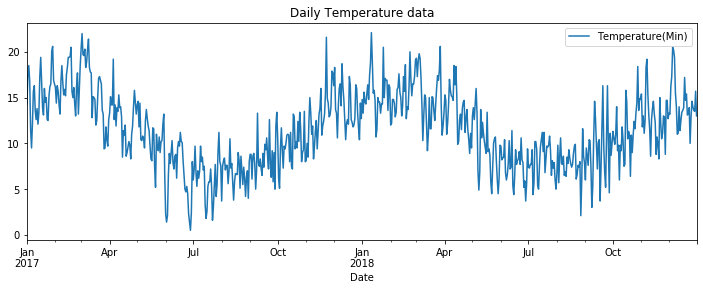

In [12]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Daily Temperature data')
plt.show(block=False)

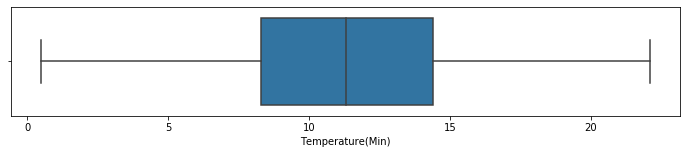

In [13]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Temperature(Min)'],whis=1.5)

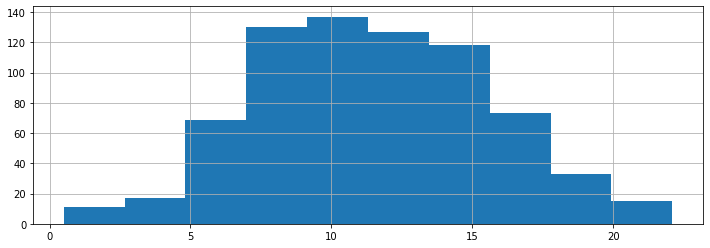

In [14]:
fig = data['Temperature(Min)'].hist(figsize = (12,4))

In [15]:
train_len = 511
train = data[0:train_len] # first 511 months as training set
test = data[train_len:] # last 219 months as out-of-time test set

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 219 entries, 2018-05-27 to 2018-12-31
Data columns (total 1 columns):
Temperature(Min)    219 non-null float64
dtypes: float64(1)
memory usage: 3.4 KB


In [17]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Temperature(Min)'][train_len-1]

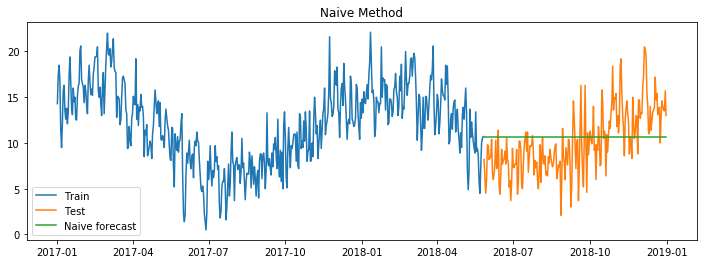

In [18]:
plt.figure(figsize=(12,4))
plt.plot(train['Temperature(Min)'], label='Train')
plt.plot(test['Temperature(Min)'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_naive['naive_forecast'])/test['Temperature(Min)'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,3.49,35.78


In [20]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Temperature(Min)'].mean()

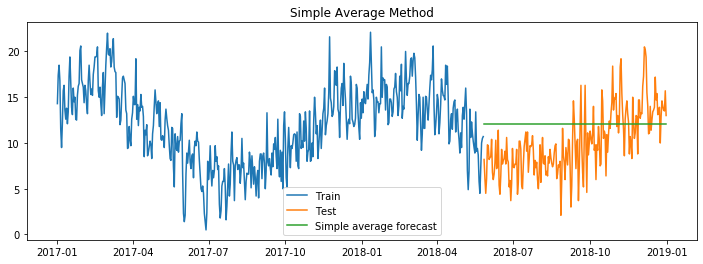

In [21]:
plt.figure(figsize=(12,4))
plt.plot(train['Temperature(Min)'], label='Train')
plt.plot(test['Temperature(Min)'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [23]:
rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_avg['avg_forecast'])/test['Temperature(Min)'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,3.49,35.78
0,Simple average method,3.94,44.87


In [24]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Temperature(Min)'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

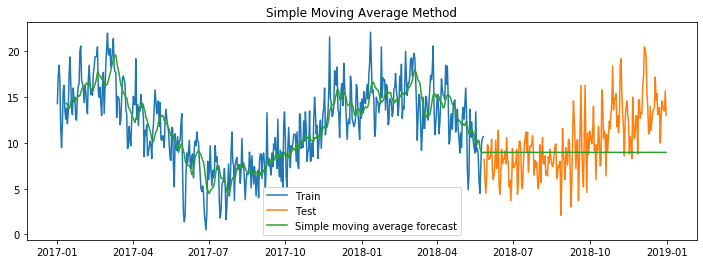

In [25]:
plt.figure(figsize=(12,4))
plt.plot(train['Temperature(Min)'], label='Train')
plt.plot(test['Temperature(Min)'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [27]:
rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_sma['sma_forecast'][train_len:])/test['Temperature(Min)'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,3.49,35.78
0,Simple average method,3.94,44.87
0,Simple moving average forecast,3.62,29.91


In [28]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Temperature(Min)'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(219)

c:\Users\s.ag.chakraborty\AppData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


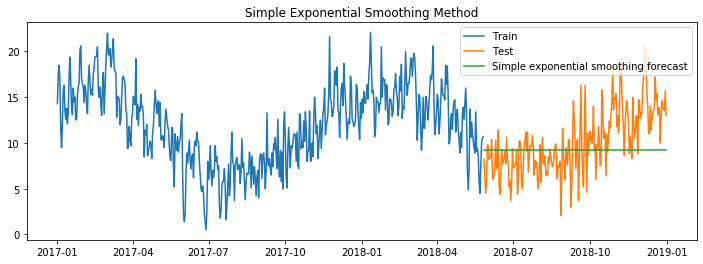

In [29]:
plt.figure(figsize=(12,4))
plt.plot(train['Temperature(Min)'], label='Train')
plt.plot(test['Temperature(Min)'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [30]:
rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_ses['ses_forecast'])/test['Temperature(Min)'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,3.49,35.78
0,Simple average method,3.94,44.87
0,Simple moving average forecast,3.62,29.91
0,Simple exponential smoothing forecast,3.56,30.24


In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Temperature(Min)']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.5, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.5, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 14.3, 'initial_slope': 3.099999999999998, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


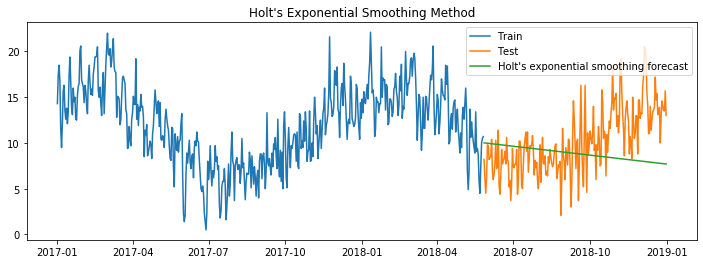

In [37]:
plt.figure(figsize=(12,4))
plt.plot( train['Temperature(Min)'], label='Train')
plt.plot(test['Temperature(Min)'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [38]:
rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_holt['holt_forecast'])/test['Temperature(Min)'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,3.49,35.78
0,Simple average method,3.94,44.87
0,Simple moving average forecast,3.62,29.91
0,Simple exponential smoothing forecast,3.56,30.24
0,Holt's exponential smoothing method,4.11,34.17


### Holt Winters' additive method with trend and seasonality

In [40]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Temperature(Min)']) ,seasonal_periods=30 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(219)

{'smoothing_level': 0.6746181790382475, 'smoothing_slope': 2.9104944726839204e-25, 'smoothing_seasonal': 1.3135682334928428e-24, 'damping_slope': nan, 'initial_level': 12.385428247523706, 'initial_slope': 5.472519563107773e-23, 'initial_seasons': array([3.06576585, 2.57167561, 2.59347279, 3.1032156 , 2.57753832,
       2.39890865, 2.50841099, 3.15923703, 3.31009357, 2.99042322,
       3.07098738, 2.81638854, 1.82038689, 2.77133564, 2.96935768,
       2.99683318, 1.94766889, 2.75726549, 2.45511863, 1.77655286,
       1.9980976 , 2.83114692, 1.658501  , 0.96252584, 1.82557137,
       1.82975108, 2.09879099, 2.71482524, 3.23098637, 3.24699864]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


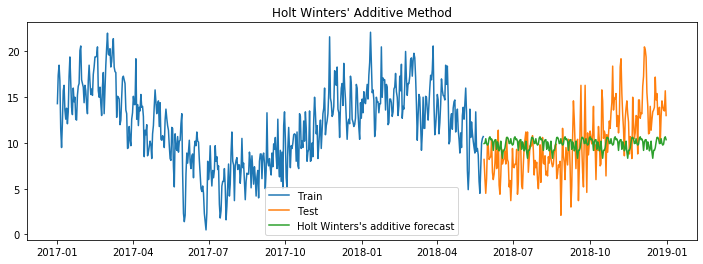

In [41]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Temperature(Min)'], label='Train')
plt.plot(test['Temperature(Min)'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [42]:
rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_hwa['hw_forecast'])/test['Temperature(Min)'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,3.49,35.78
0,Simple average method,3.94,44.87
0,Simple moving average forecast,3.62,29.91
0,Simple exponential smoothing forecast,3.56,30.24
0,Holt's exponential smoothing method,4.11,34.17
0,Holt Winters' additive method,3.50,32.83
